# Preparing Simulation Data
> Notebook for preparing simulated (synthetic) data. This data will be called as a "raw data" in other notebooks.

In [1]:
from vertex_simulation.primitives import unit_hexagons, VoronoiRegions2Edges, Vertex, Monolayer
from vertex_simulation.simulation import Simulation_Honda, Simulation_Honda_t
import numpy as np
import torch

In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
dtype = torch.float32
print(f'device: {device}\ndtype: {dtype}')

device: cpu
dtype: torch.float32


## Raw Synthetic Dataset

Initialising cell monolayers

In [7]:
v_x,regions = unit_hexagons(4,4) # unit hexagons
edge_list,cells = VoronoiRegions2Edges(regions) #convert Voronoi regions to cells & edges

m = Monolayer(vertices = Vertex( v_x.copy().tolist(), dtype = dtype), edges = torch.tensor(edge_list), cells = cells)
m.to_(device) # to plot use --> plot_graph_as_quiver(cell_graph)

### Plotting Monolayer Graphs

In [16]:
from vertex_simulation.primitives import plot_graph_as_quiver, graph2networkx_with_pos
import matplotlib.pyplot as plt
import networkx as nx

Using `plot_graph_as_quiver`

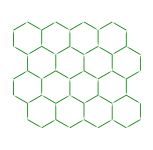

In [52]:
plt.figure(figsize=[2.5,2.5])
plot_graph_as_quiver(m)
plt.axis('equal');

Convert to `networkx.Graph` with `graph2networkx_with_pos` and use `networkx.draw` function

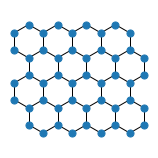

In [59]:
plt.figure(figsize=[2,2])
nx.draw(*graph2networkx_with_pos(m), node_size=50, width=1)
plt.axis('equal');

### Simulation

Prepare an initial state

In [60]:
np.random.seed(42)# np RNG seed
torch.manual_seed(0);# torch RNG seed
v_x,regions = unit_hexagons(4,4) # unit hexagons
v_x += np.random.randn(v_x.shape[0], v_x.shape[1])*.2 #perturb vertices
edge_list,cells = VoronoiRegions2Edges(regions) #convert Voronoi regions to cells & edges
# Define cell monolayer
m = Monolayer(vertices = Vertex( v_x.copy().tolist(), dtype = dtype), edges = torch.tensor(edge_list), cells = cells)
m.to_(device) # to plot use --> plot_graph_as_quiver(cell_graph)

In [61]:
m

Monolayer 16 cells, Graph: 63 edges; 48 vertices

In [4]:
# omega_0 = torch.tensor([np.pi/2],dtype=dtype,device=device)
# phase = torch.rand((len(edge_list),1)).type(dtype).to(device)
# p_keep = 0.75 # fraction to keep active
# e_ij_on = (torch.rand((len(edge_list),1))<p_keep).type(dtype).to(device)
# omega = torch.randn_like(e_ij_on) + omega_0

# sim = simulation.Simulation_Honda(m = cell_graph, params = {'Ka':1., 'A0':2.3,'Kp':0.003,'P0':0.,
#                                                  'Lambda_ij': lambda m,t: e_ij_on*torch.cos(omega*t+phase)**2 })
# t, verts_t, Energies_maxSpeeds = sim.sample_trajectory(T=1000, delta_T=0.001, sample_freq=10, print_freq=200)